# Unit 3 Capstone

In [96]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.svm import SVR
import time

### Data
from https://www.kaggle.com/fernandol/countries-of-the-world

In [71]:
# US Government data on countries fo the worls
countries = pd.read_csv('~/Desktop/Data_Science/countries.csv', decimal=',')


In [16]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [45]:
countries.shape

(227, 20)

In [46]:
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [17]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [76]:
countries.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Numeric Variables

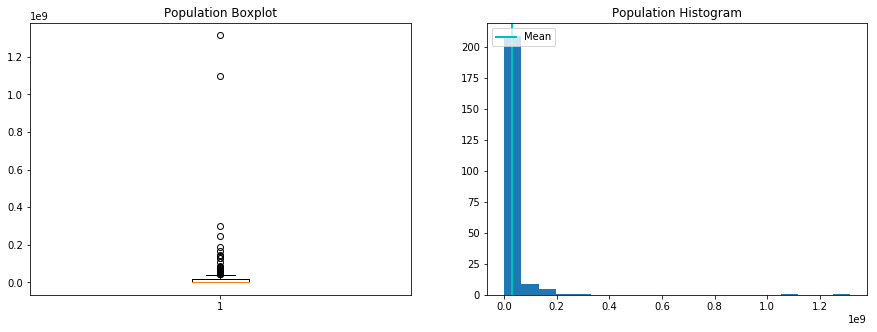

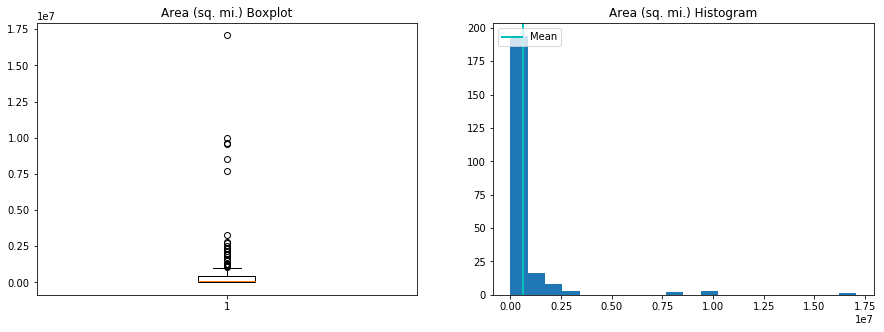

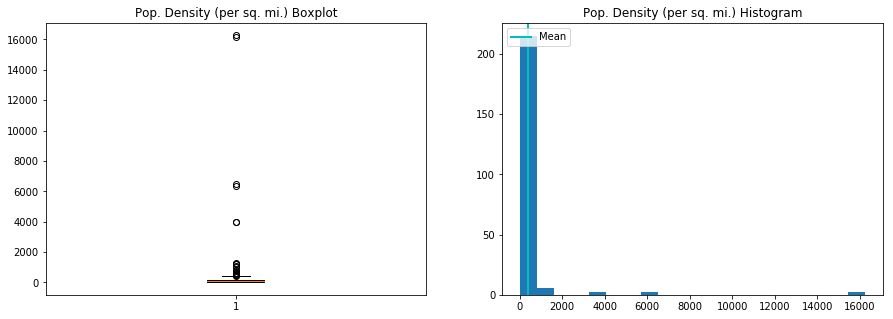

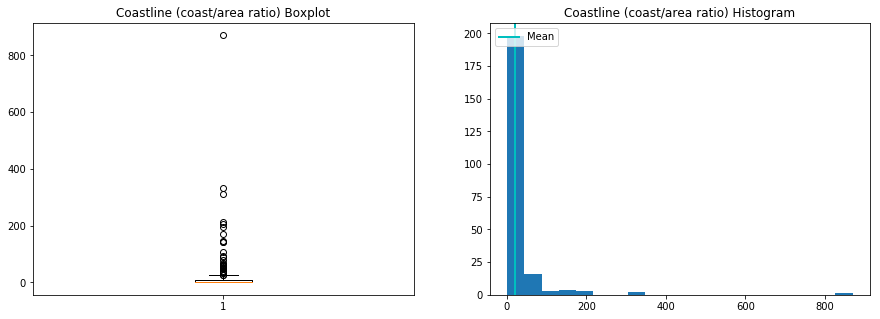

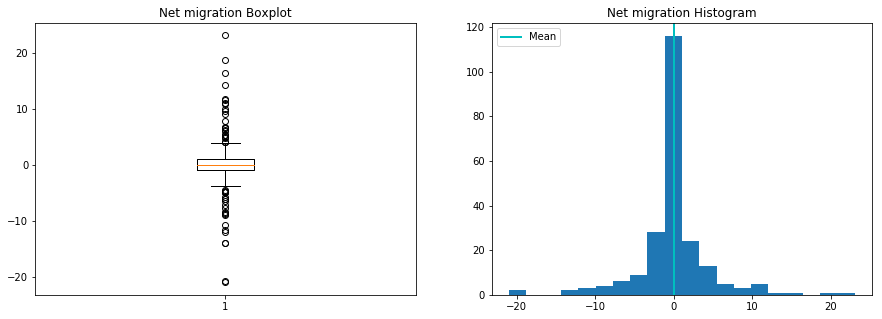

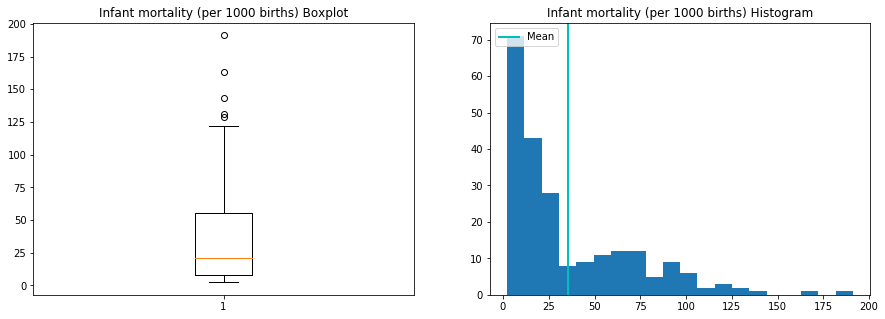

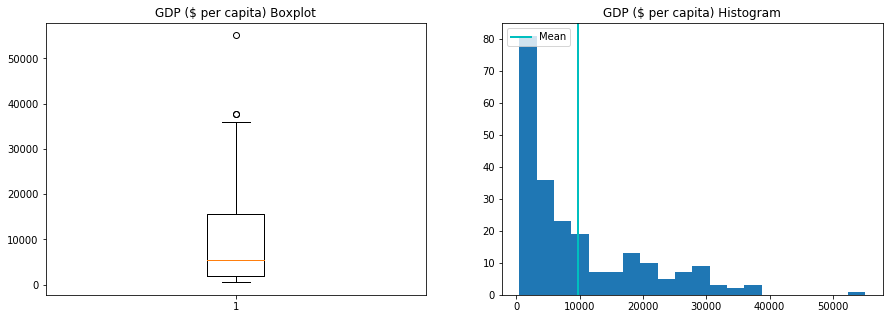

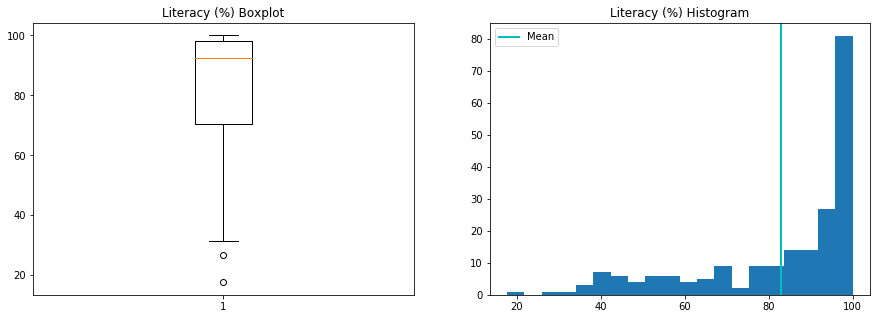

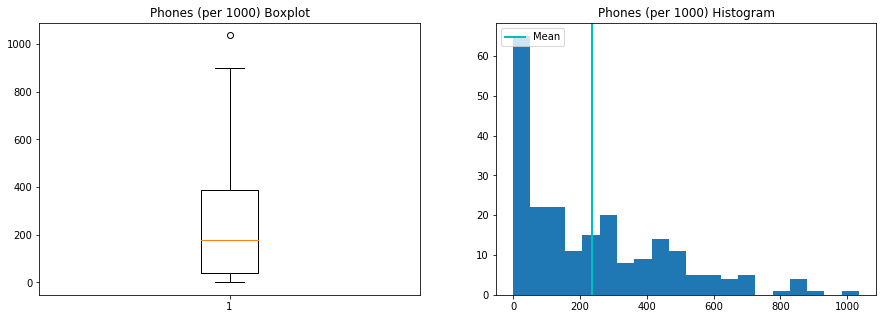

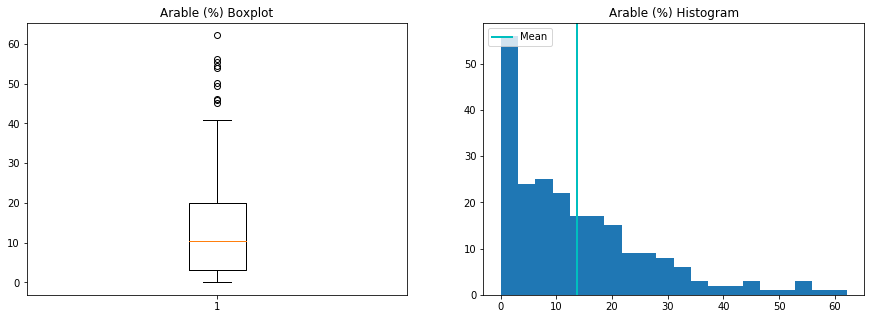

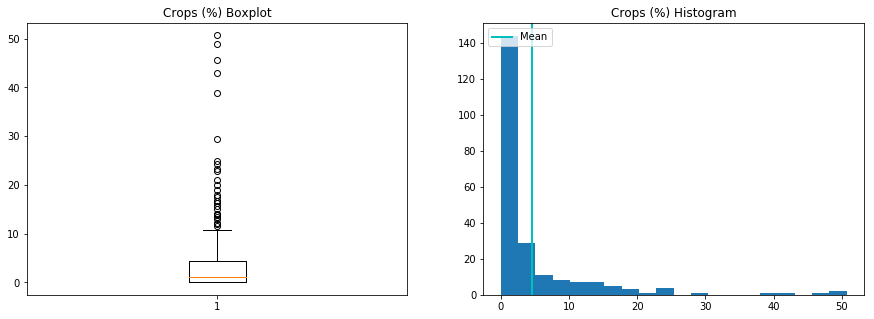

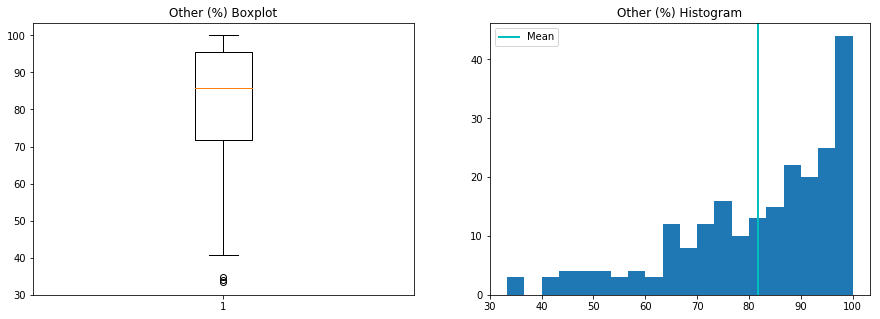

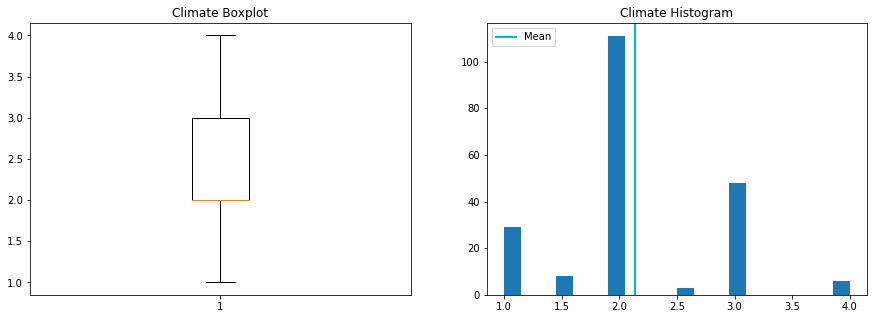

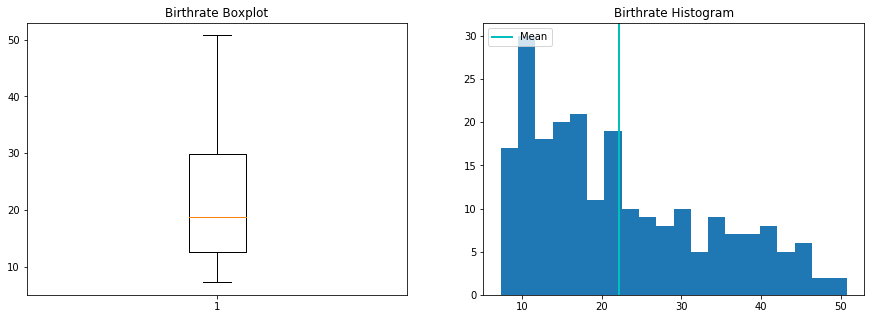

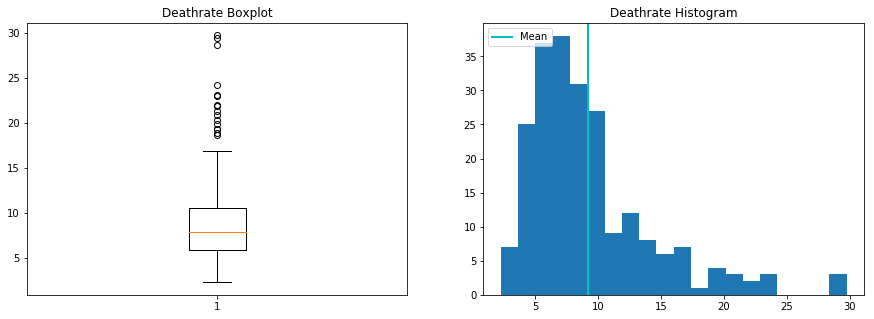

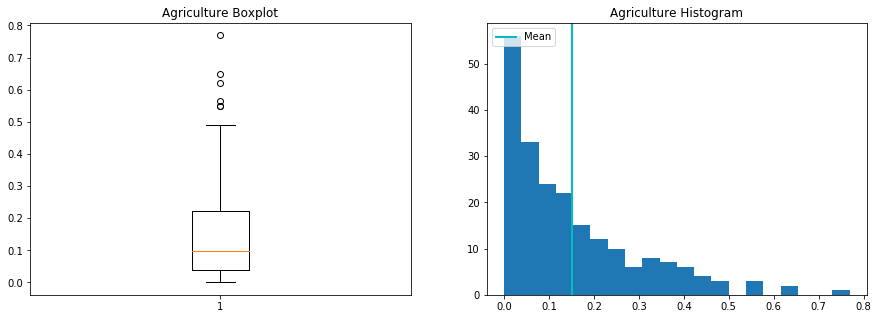

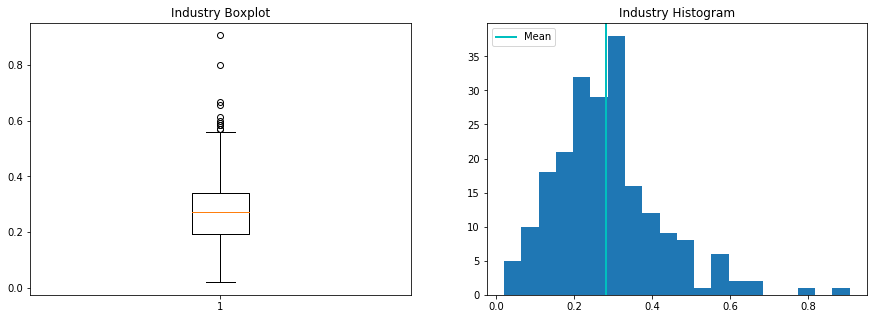

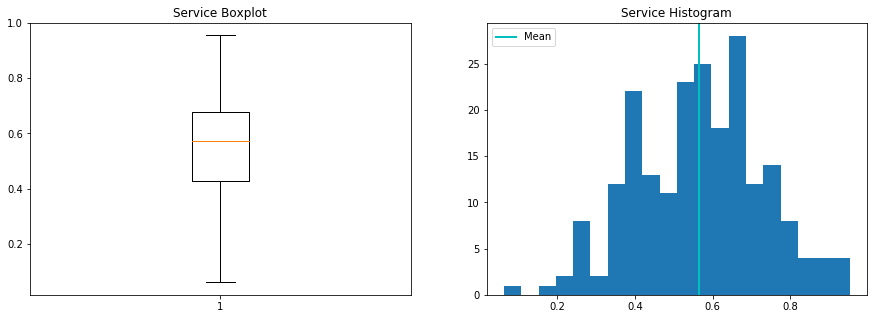

In [18]:
from pandas.api.types import is_numeric_dtype

# Visualize distributions of each column
for column in countries:
    
    if is_numeric_dtype(countries[column]):
    
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.boxplot(countries[column].dropna(how = 'any'))
        plt.title(column + ' Boxplot')

        plt.subplot(1, 2, 2)
        plt.hist(countries[column].dropna(how = 'any'), bins=20)
        plt.axvline(countries[column].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
        plt.legend(loc='upper left') 
        plt.title(column + ' Histogram')

        plt.show()


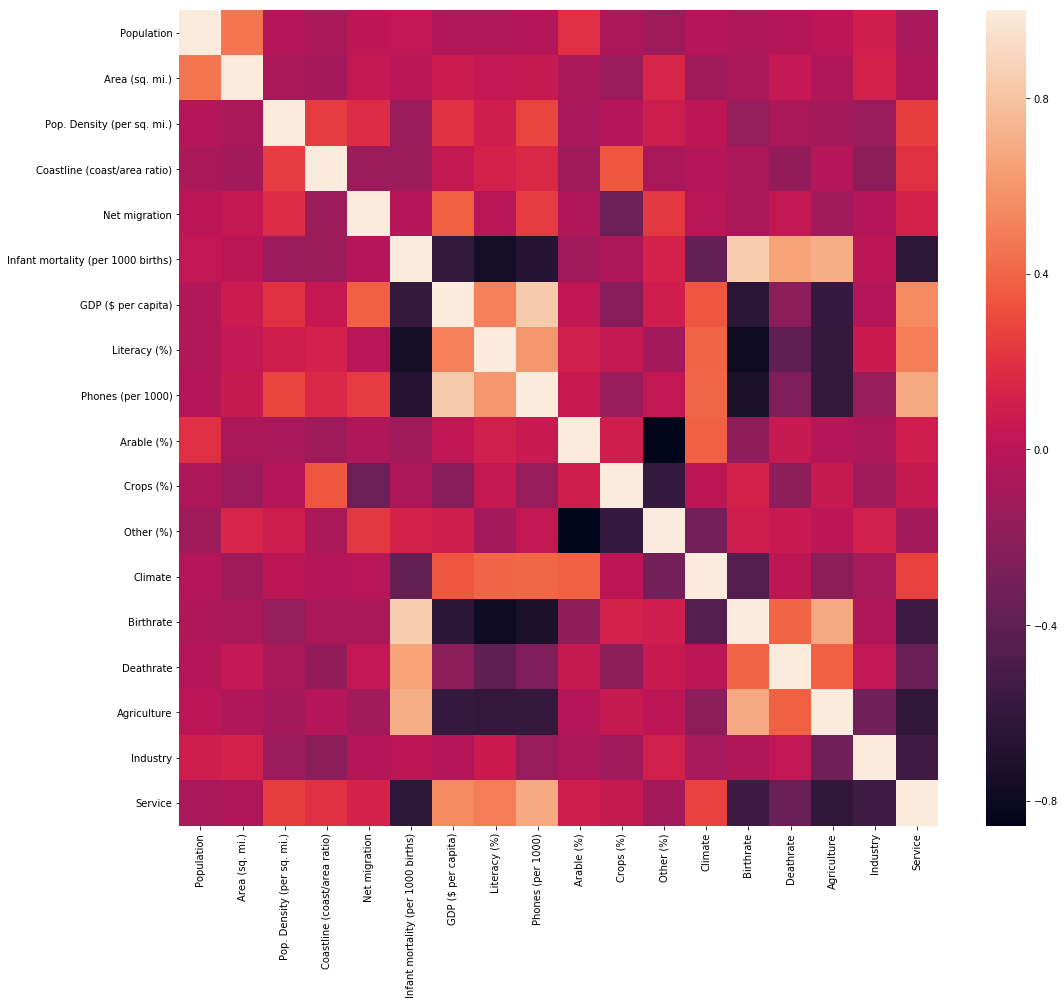

In [19]:
corr = countries.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Categorical Variables

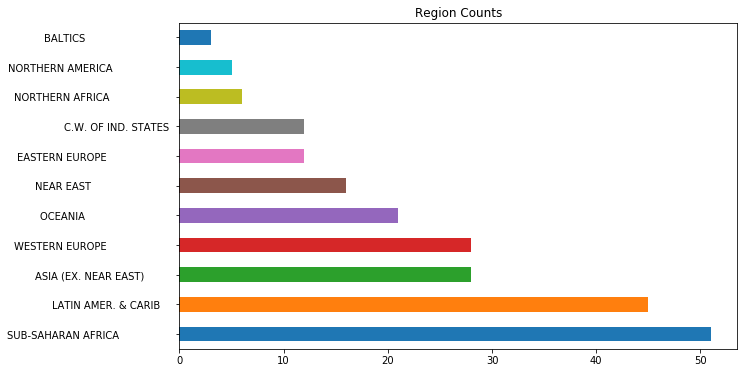

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64


In [29]:
plt.figure(figsize=(10, 6))
plt.title('Region Counts')
pd.value_counts(countries['Region']).plot.barh()
plt.show()

print(countries['Region'].value_counts())

In [57]:
countries = pd.get_dummies(countries, columns=['Region'])

In [58]:
countries.head()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


# Can we predict net migration?

In [59]:
corr = countries.corr()
print(corr['Net migration'])

Population                                    0.000011
Area (sq. mi.)                                0.047470
Pop. Density (per sq. mi.)                    0.178038
Coastline (coast/area ratio)                 -0.134145
Net migration                                 1.000000
Infant mortality (per 1000 births)           -0.025015
GDP ($ per capita)                            0.382461
Literacy (%)                                 -0.008761
Phones (per 1000)                             0.239601
Arable (%)                                   -0.058170
Crops (%)                                    -0.347968
Other (%)                                     0.225299
Climate                                      -0.015170
Birthrate                                    -0.066537
Deathrate                                     0.033611
Agriculture                                  -0.116719
Industry                                     -0.026324
Service                                       0.127134
Region_ASI

The five variable showing strongest correlation with Net Migration are the following: GDP, Crops, Other, Region of Western Europe and Phones <br>
Let's plot those relationships.

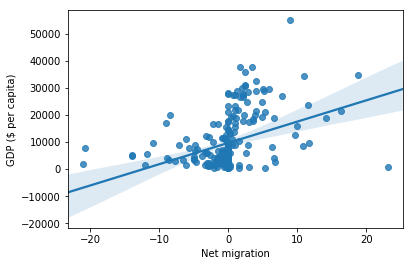

In [49]:
sns.regplot(x='Net migration', y='GDP ($ per capita)', data=countries)
plt.show()

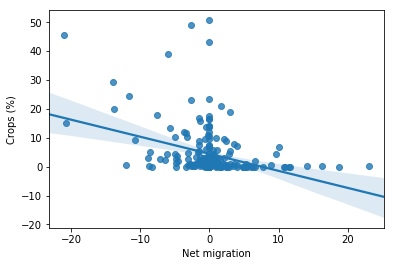

In [50]:
sns.regplot(x='Net migration', y='Crops (%)', data=countries)
plt.show()

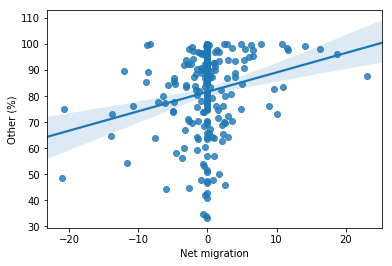

In [51]:
sns.regplot(x='Net migration', y='Other (%)', data=countries)
plt.show()

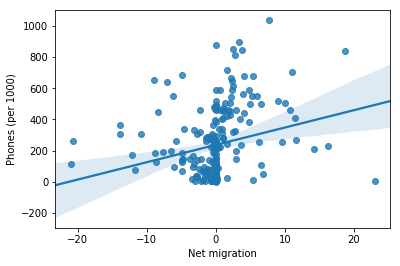

In [52]:
sns.regplot(x='Net migration', y='Phones (per 1000)', data=countries)
plt.show()

### Prepare data for modeling

In [84]:
countries.isnull().sum(axis=0)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [87]:
countries_dropped = countries.dropna()

In [88]:
Y = countries_dropped['Net migration']
X = countries_dropped.drop(['Net migration', 'Country', 'Region'], 1)

In [106]:
def model_results(model):
    score = cross_val_score(model,X,Y, cv=5)
    y_pred = cross_val_predict(model,X,Y,cv=5)
    print('Cross Validation Scores:\n', score)
    print("\nCross Validation Range: %0.3f to %0.3f" % (score.min(), score.max()))
    print("\nCross Validation Average: %0.3f" % (score.mean()))

## Linear Regression

In [89]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

score = cross_val_score(regr, X, Y, cv=10)

print('Cross Validation Average: ', score.mean())

Cross Validation Average:  0.19726938987963355


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [107]:
model_results(regr)

Cross Validation Scores:
 [ 0.01614778  0.36853213 -0.1126734   0.32523247 -0.07141882]

Cross Validation Range: -0.113 to 0.369

Cross Validation Average: 0.105


### Ridge Regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4806841272051884e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0829304823527295e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3882616639648044e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.000610003901021e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1297922179137795e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1483780277259168e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.513289662901852e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.382288920894736e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.618148839263357e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1974443355385565e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.292357996041845e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.811078572892047e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.

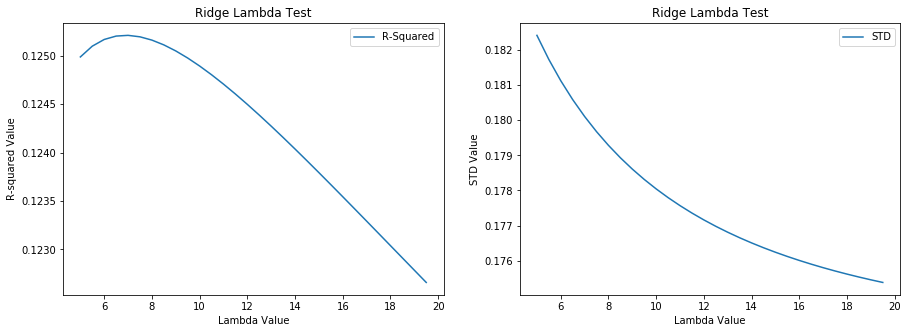

Ridge Lambda Value(s) with lowest STD:


,lambda_value,ridge_score,std
29,19.5,0.12266,0.175381


In [93]:
# tune ridge

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    ridge = linear_model.Ridge(alpha=value, fit_intercept=False)  
    ridge_score = cross_val_score(ridge, X, Y, cv=5)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "ridge_score": [ridge_score.mean()], "std": [ridge_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(5, 20, 0.5)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
ridge_results = pd.concat(appended_data, ignore_index=True)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(ridge_results['lambda_value'], ridge_results['ridge_score'], label="R-Squared")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(ridge_results['lambda_value'], ridge_results['std'], label="STD")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.show()

print('Ridge Lambda Value(s) with lowest STD:')
ridge_results.loc[ridge_results['std'] == ridge_results['std'].min()]

In [108]:
ridge = linear_model.Ridge(alpha=19.5, fit_intercept=False) 

In [109]:
model_results(ridge)

Cross Validation Scores:
 [ 0.08318295  0.36089341 -0.0760622   0.28995705 -0.04467307]

Cross Validation Range: -0.076 to 0.361

Cross Validation Average: 0.123


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.769902267023745e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1974443355385565e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.292357996041845e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.

## Lasso Regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

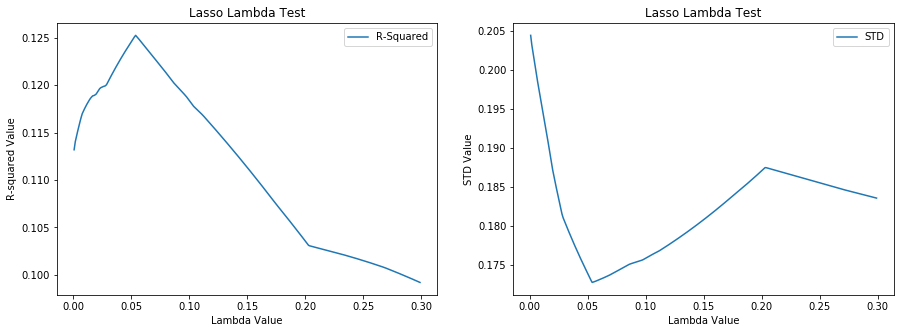

Lasso Lambda Value(s) with lowest STD:


,lambda_value,lasso_score,std
53,0.054,0.125268,0.172754


In [95]:
# tune lasso

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in lasso model
    lasso = linear_model.Lasso(alpha=value)  
    lasso_score = cross_val_score(lasso, X, Y, cv=5)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "lasso_score": [lasso_score.mean()], "std": [lasso_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(0.001, 0.3, 0.001)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
lasso_results = pd.concat(appended_data, ignore_index=True)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(lasso_results['lambda_value'], lasso_results['lasso_score'], label="R-Squared")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(lasso_results['lambda_value'], lasso_results['std'], label="STD")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.show()

print('Lasso Lambda Value(s) with lowest STD:')
lasso_results.loc[lasso_results['std'] == lasso_results['std'].min()]

In [110]:
lasso = linear_model.Lasso(alpha=0.054) 

In [111]:
model_results(lasso)

Cross Validation Scores:
 [ 0.07960879  0.35849132 -0.06096144  0.29498275 -0.04577958]

Cross Validation Range: -0.061 to 0.358

Cross Validation Average: 0.125


## SVM

In [97]:
svr = SVR()
cross_val_score(svr, X, Y, cv=5)

array([-0.03804156, -0.0568228 , -0.0325652 , -0.03330477, -0.00203819])